# ENIT   2024_2025
# Module : Intelligence Artificielle & Applications
# Projet : Analyse des Données de Vol aux États-Unis
## Binome : Lekehal Hammada & Neffati Manel
## Classe : 3AGI+NePRev
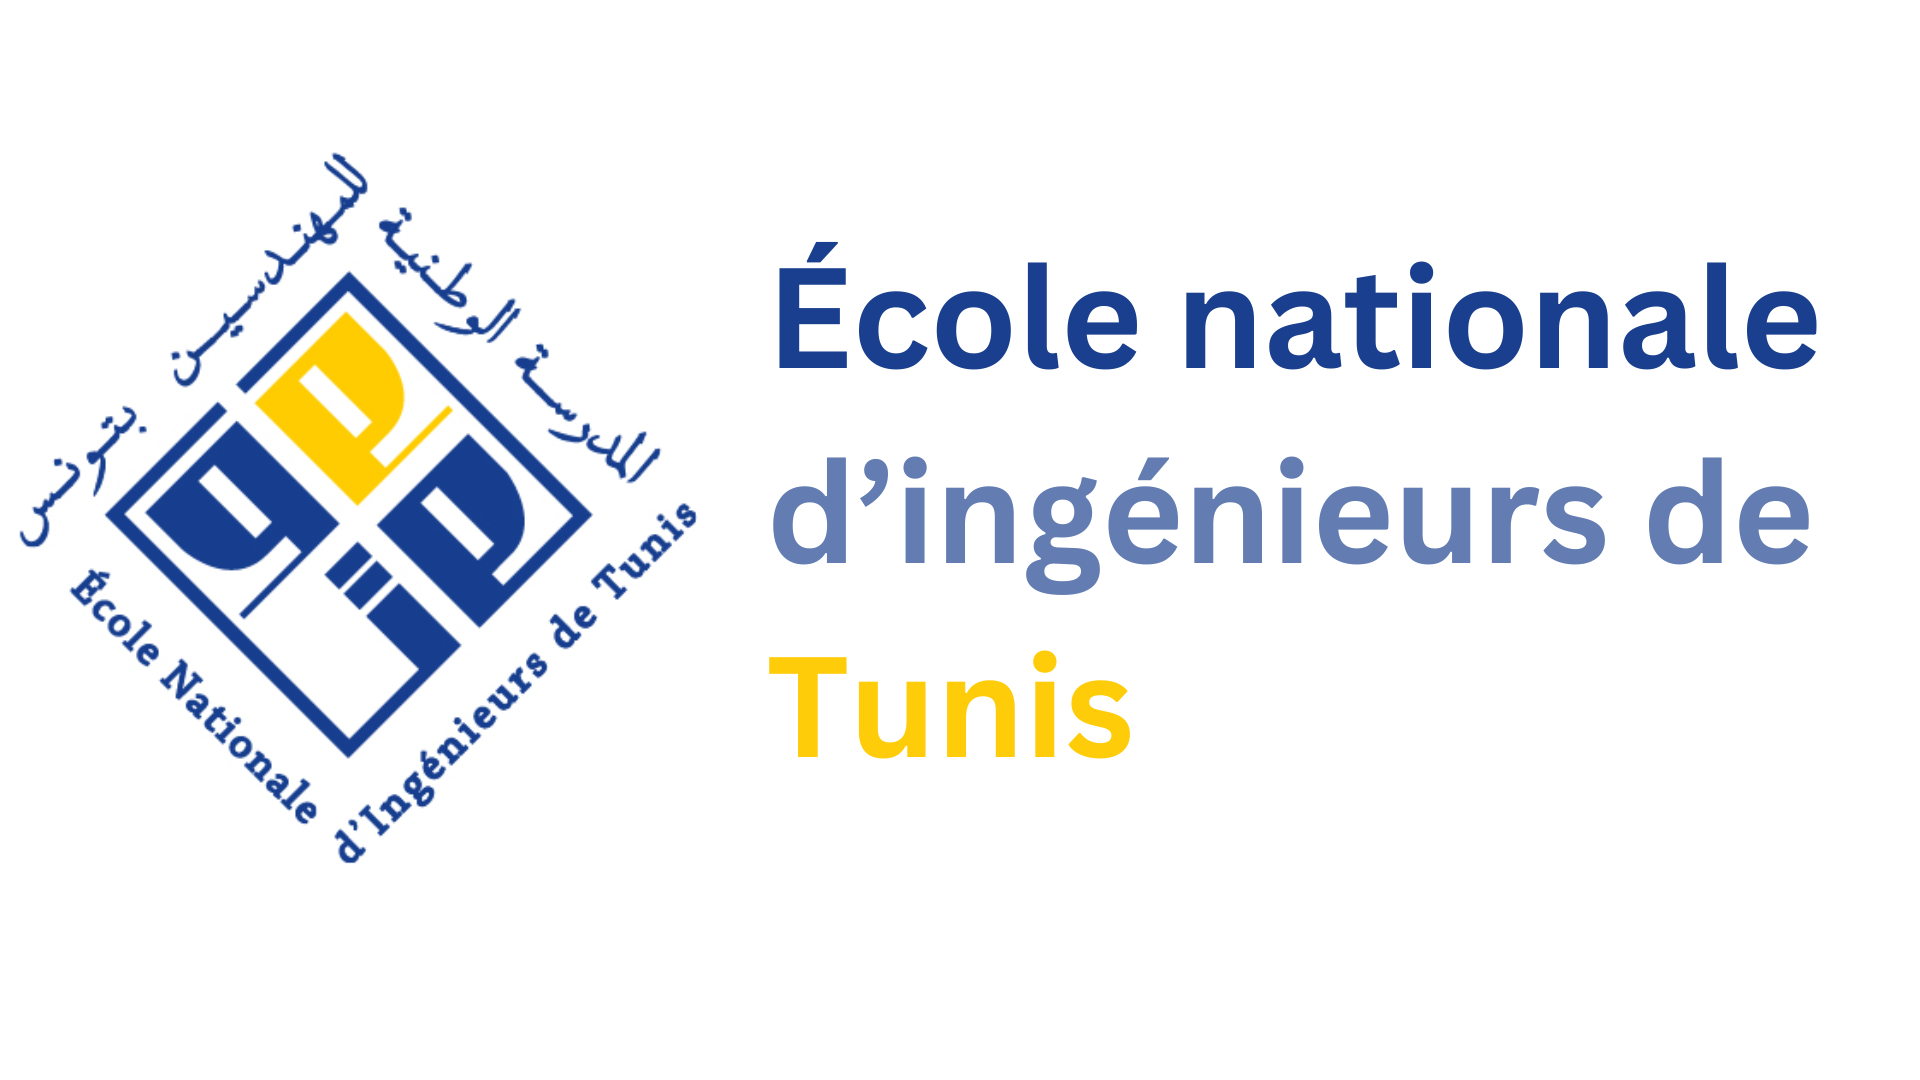



# 1.  Contexte Général



Ce projet se concentre sur l’analyse des données opérationnelles des vols commerciaux aux États-Unis entre 2000 et 2002.

Les objectifs principaux sont d'extraire des insights pertinents et de modéliser des phénomènes critiques tels que les retards et les déviations des vols, en utilisant des approches analytiques et des outils d'apprentissage automatique.

# 2. Description de la base

Ces données incluent des informations détaillées sur les départs, les arrivées, les retards, les déviations et d'autres attributs liés à l'exploitation aérienne :

1. ***Informations temporelles***

    * *Year* : Année où le vol a eu lieu.

    * *Month* : Mois où le vol a eu lieu.

    * *DayofMonth* : Jour du mois où le vol a eu lieu.

    * *DayOfWeek* : Jour de la semaine, codé de 1 à 7.

    * *DepTime* : Heure de départ réelle.

    * *CRSDepTime* : Heure de départ prévue.

    * *ArrTime* : Heure d'arrivée réelle.

    * *CRSArrTime* : Heure d'arrivée prévue.

2. ***Identifiants***

    * *UniqueCarrier* : Code unique attribué à la compagnie aérienne.

    * *FlightNum* : Numéro unique de vol.

    * *TailNum* : Numéro de série ou d'identification de l'avion.

3. ***Durées et distances***

    * *ActualElapsedTime* : Temps total de vol réel.

    * *AirTime* : Temps passé en vol (exclut taxi, décollage, et atterrissage).

    * *Distance* : Distance entre les aéroports d'origine et de destination.

4. ***Retards***

    * *ArrDelay* : Retard à l'arrivée.

    * *DepDelay* : Retard au départ.

    * *CarrierDelay* : Retard causé par la compagnie aérienne.

    * *WeatherDelay* : Retard causé par les conditions météorologiques.

    * *NASDelay* : Retard causé par des contraintes dans le système national de l'espace aérien.

    * *SecurityDelay* : Retard causé par des problèmes de sécurité.

    * *LateAircraftDelay* : Retard causé par l'arrivée tardive de l'avion précédent.

5. ***Informations Aéroports***

    * *Origin* : Code de l'aéroport d'origine.

    * *Dest* : Code de l'aéroport de destination.

6. ***Activités au sol***

    * *TaxiIn* : Temps passé à rouler sur la piste après l'atterrissage.

    * *TaxiOut* : Temps passé à rouler sur la piste avant le décollage.

7. ***Annulations et déviations***

    * *Cancelled* : Indique si le vol a été annulé.

    * *CancellationCode* : Raison de l'annulation.

    * *Diverted* : Indique si le vol a été dévié.


# 3. EDA (Exploratory Data Analysis)

## 3.1 Importation des donnees

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import pearsonr

In [2]:
df1 = pd.read_csv('C:/Users/21658/Desktop/Mini-Projet DL/2000.csv', encoding='latin-1')
df2 = pd.read_csv('C:/Users/21658/Desktop/Mini-Projet DL/2002.csv', encoding='latin-1')

## 3.2 Concatenation du deux datasets

In [3]:
data= pd.concat([df1, df2], ignore_index=True)

## 3.3 Exploration

In [ ]:
data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [ ]:
print(data.shape)

(10954406, 29)


La base de données contient un total de 10 954 406 lignes, chacune représentant les données relatives à un vol, ainsi que 29 colonnes correspondant aux informations collectées sur chaque vol.

In [ ]:
print(data.head())

   Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  2000      1          28          5   1647.0        1647   1906.0   
1  2000      1          29          6   1648.0        1647   1939.0   
2  2000      1          30          7      NaN        1647      NaN   
3  2000      1          31          1   1645.0        1647   1852.0   
4  2000      1           1          6    842.0         846   1057.0   

   CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
0        1859            HP        154  ...     15       11          0   
1        1859            HP        154  ...      5       47          0   
2        1859            HP        154  ...      0        0          1   
3        1859            HP        154  ...      7       14          0   
4        1101            HP        609  ...      3        8          0   

   CancellationCode  Diverted  CarrierDelay WeatherDelay NASDelay  \
0               NaN         0           NaN          NaN   

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10954406 entries, 0 to 10954405
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   float64
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay    

## 3.4 Description statistique

In [ ]:
data.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.095441e+07,1.095441e+07,1.095441e+07,1.095441e+07,1.070177e+07,1.095441e+07,1.067916e+07,1.095441e+07,1.095441e+07,1.067916e+07,...,1.095441e+07,1.095441e+07,1.095441e+07,0.0,1.095441e+07,0.0,0.0,0.0,0.0,0.0
mean,2.000962e+03,6.520314e+00,1.573864e+01,3.946372e+00,1.348528e+03,1.341895e+03,1.494810e+03,1.504292e+03,1.250855e+03,1.281784e+02,...,6.203672e+00,1.540653e+01,2.306223e-02,NaN,2.064010e-03,NaN,NaN,NaN,NaN,NaN
std,9.992936e-01,3.426425e+00,8.783647e+00,1.991766e+00,4.814253e+02,4.713059e+02,5.085278e+02,4.909341e+02,1.006286e+03,7.110349e+01,...,8.761378e+00,1.089610e+01,1.501012e-01,NaN,4.538447e-02,NaN,NaN,NaN,NaN,NaN
min,2.000000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-6.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,2.000000e+03,4.000000e+00,8.000000e+00,2.000000e+00,9.300000e+02,9.290000e+02,1.115000e+03,1.120000e+03,4.900000e+02,7.400000e+01,...,4.000000e+00,1.000000e+01,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
50%,2.000000e+03,7.000000e+00,1.600000e+01,4.000000e+00,1.333000e+03,1.330000e+03,1.525000e+03,1.529000e+03,1.062000e+03,1.100000e+02,...,5.000000e+00,1.300000e+01,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
75%,2.002000e+03,9.000000e+00,2.300000e+01,6.000000e+00,1.740000e+03,1.730000e+03,1.922000e+03,1.920000e+03,1.763000e+03,1.620000e+02,...,7.000000e+00,1.800000e+01,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
max,2.002000e+03,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,6.879000e+03,1.613000e+03,...,1.440000e+03,1.439000e+03,1.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN


Les colonnes *CancellationCode*, *CarrierDelay*, *WeatherDelay*, *NASDelay*, *SecurityDelay* et *LateAircraftDelay* contiennent uniquement des valeurs nulles (ou des zéros), ce qui indique qu'elles sont vides. Par conséquent, nous allons les supprimer afin d'optimiser la base de données.

## 3.5 Identification des valeurs manquantes

In [ ]:
missing_values = data.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values)

Valeurs manquantes par colonne :
 Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                252633
CRSDepTime                  0
ArrTime                275243
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                 29924
ActualElapsedTime      275243
CRSElapsedTime            269
AirTime                275364
ArrDelay               275243
DepDelay               252633
Origin                      0
Dest                        0
Distance                    0
TaxiIn                      0
TaxiOut                     0
Cancelled                   0
CancellationCode     10954406
Diverted                    0
CarrierDelay         10954406
WeatherDelay         10954406
NASDelay             10954406
SecurityDelay        10954406
LateAircraftDelay    10954406
dtype: int64


## 3.6 Supression  des colonnes vides

In [ ]:
colonnes_a_supprimer=['CancellationCode', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay','LateAircraftDelay' ]

In [ ]:
data = data.drop(columns=colonnes_a_supprimer)

In [ ]:
print(data)

          Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0         2000      1          28          5   1647.0        1647   1906.0   
1         2000      1          29          6   1648.0        1647   1939.0   
2         2000      1          30          7      NaN        1647      NaN   
3         2000      1          31          1   1645.0        1647   1852.0   
4         2000      1           1          6    842.0         846   1057.0   
...        ...    ...         ...        ...      ...         ...      ...   
10954401  2002     12           9          1   2107.0        2115    503.0   
10954402  2002     12          10          2   2104.0        2115    505.0   
10954403  2002     12          11          3   2128.0        2115    543.0   
10954404  2002     12          12          4   2109.0        2115    508.0   
10954405  2002     12          13          5   2105.0        2115    515.0   

          CRSArrTime UniqueCarrier  FlightNum  ... AirTime  Arr

## 3.7 Gestion des valeurs manquantes

In [ ]:
from sklearn.impute import SimpleImputer

# Imputation des colonnes numériques avec la moyenne
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
numeric_imputer = SimpleImputer(strategy='mean')
data[numeric_columns] = numeric_imputer.fit_transform(data[numeric_columns])

# Imputation des colonnes catégorielles avec la modalité la plus fréquente
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])

In [ ]:
data = data.dropna()

In [ ]:
missing_values = data.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values)

Valeurs manquantes par colonne :
 Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
Diverted             0
dtype: int64


# Feature Analysis


Pour simplifier nos analyses, nous allons créer une fonction permettant d'explorer la distribution de chaque variable et d'identifier les éventuelles valeurs aberrantes.

## Diagnostic_plots (Fonction 1)

In [ ]:
def diagnostic_plots(df, variable):
    plt.figure(figsize = (16, 4))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins = 30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist = "norm", plot = plt)
    plt.ylabel('Variable quantiles')

    # Boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y = df[variable])
    plt.title('Boxplot')

    plt.show()

# 4. Analyse des retards

**Quels sont les meilleurs moments et jours de la semaine pour
minimiser les retards chaque année ?**

## 4.1 Distribution de la variable "ArrDelay"

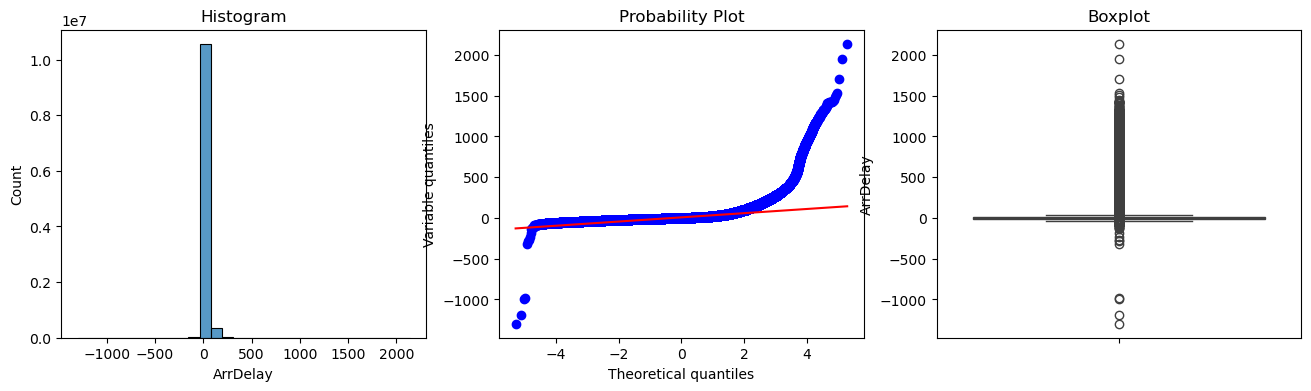

In [ ]:
diagnostic_plots(data, 'ArrDelay')

***1. Histogramme (Graphique de gauche) :***


*  Cet histogramme montre la distribution de la variable ArrDelay.
*   La plupart des vols ont des retards à l'arrivée proches de 0, ce qui est représenté par une barre très haute autour de cette valeur.
*   On observe également des retards positifs (arrivées en retard) et des valeurs négatives (arrivées en avance). Cependant, ces valeurs sont beaucoup moins fréquentes.
*   Les longues queues (long tail) des deux côtés indiquent la présence de valeurs aberrantes, notamment des retards très importants.


***2. Probability Plot (Graphique au centre) :***


*  Ce graphique compare la distribution des données réelles à une distribution théorique normale (représentée par la ligne rouge).
*   Les données dévient de la ligne droite, en particulier aux extrémités, ce qui indique que la distribution de ArrDelay n'est pas normale.
*   Les points situés loin des zones centrales montrent des valeurs aberrantes ou extrêmes dans les données.

***3. Boxplot (Graphique de droite) :***



*  Le boxplot met en évidence la présence de nombreuses valeurs aberrantes, visibles comme des cercles au-dessus et en dessous des "moustaches" (whiskers).
*   La majorité des données se trouvent dans la boîte centrale (interquartile range, IQR), mais les valeurs extrêmes (très grands retards ou avancées) sont clairement identifiables.
*   Les moustaches sont relativement courtes, ce qui signifie que les données principales sont concentrées autour de la médiane, avec des valeurs aberrantes éloignées.






## 4.2 ArrDelay en fonction des jours de la semaine et colorée selon l'année

Étant donné la taille importante de notre base de données, nous allons sélectionner un échantillon aléatoire représentant 10 % des données afin de faciliter l'interprétation des résultats.

<Axes: xlabel='DayOfWeek', ylabel='ArrDelay'>

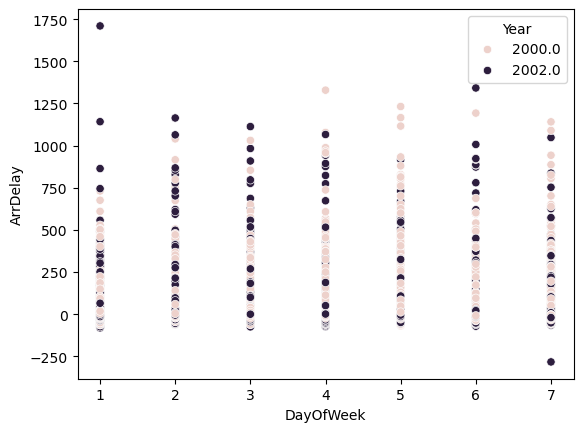

In [ ]:
sns.scatterplot(data = data.sample(frac=0.1, random_state=42), x = "DayOfWeek", y = "ArrDelay", hue = "Year")

On remarque qu'il y a des retards toutes les journées de la semaine pendant les deux années.

## 4.3 Analyse via un heatmap

Pour pouvoir répondre à la question posée, on va se concentrer sur l'heure de départ prévu (CRSDepTime), car c'est ce que les compagnies peuvent contrôler.  En analysant les retards moyens pendant toute la semaine et en fonction de l'heure de départ prévu , les compagnies peuvent améliorer la planification des leurs vols.

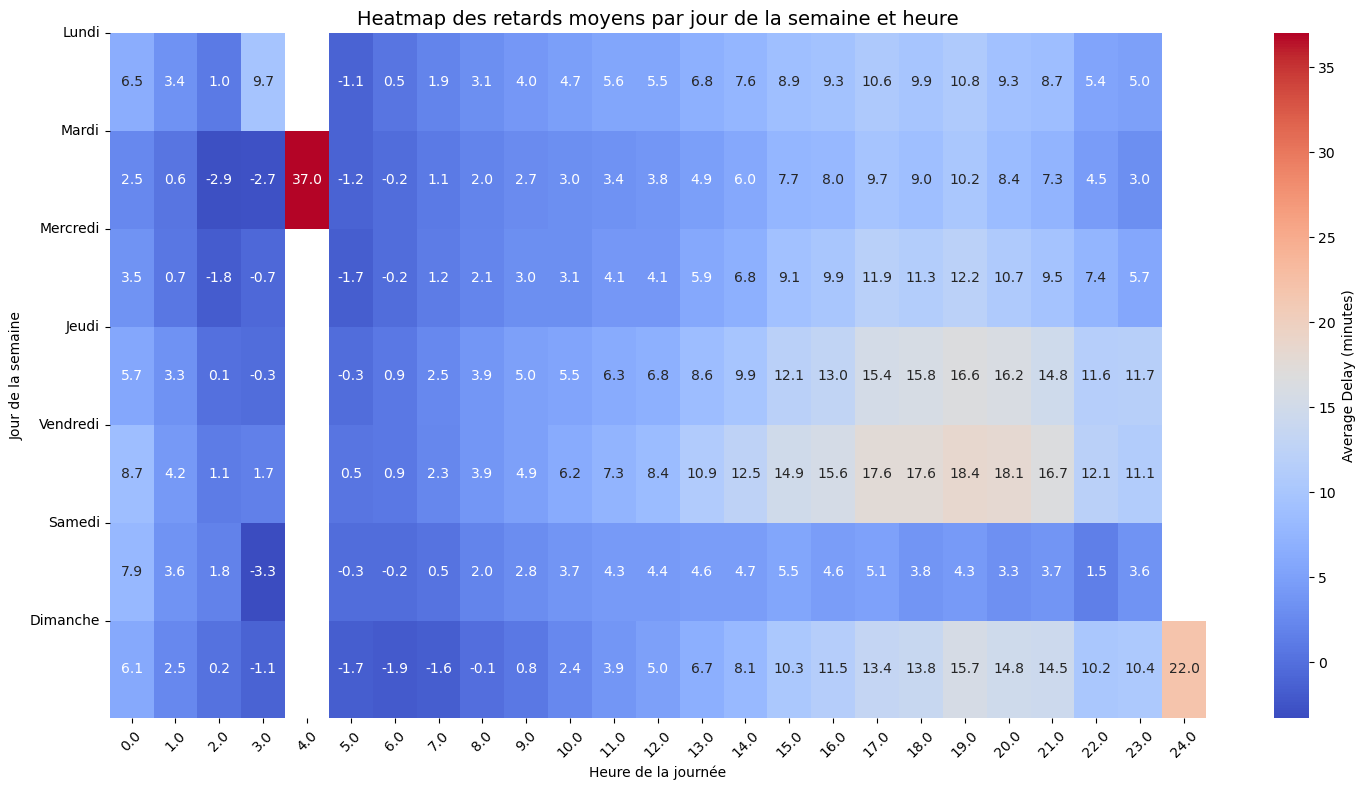

In [ ]:
# Convertir l'heure de départ prevu (CRSDepTime) en créneaux horaires
data['Hour'] = data['CRSDepTime'] // 100  # Transformer les heures au format 24h (ex: 1530 -> 15)

# Regrouper les données par jour de la semaine et heure, puis calculer les retards moyens
heatmap_data = data.groupby(['DayOfWeek', 'Hour'])['ArrDelay'].mean().reset_index()

# Réorganiser les données pour la heatmap
heatmap_pivot = heatmap_data.pivot(index='DayOfWeek', columns='Hour', values='ArrDelay')

# Créer la heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_pivot, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': 'Average Delay (minutes)'})
plt.title("Heatmap des retards moyens par jour de la semaine et heure", fontsize=14)
plt.xlabel("Heure de la journée")
plt.ylabel("Jour de la semaine")
plt.yticks(ticks=range(7), labels=["Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi", "Dimanche"], rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interprétation des résultats**


*   ***Couleurs*** :


1.  Bleu : Retard moyen faible ou négatif (arrivées en avance).
2.  Rouge : Retard moyen élevé.
3.  La couleur rouge vif (par exemple, mardi à 3h) indique un retard exceptionnellement élevé (37 minutes en moyenne).

*   ***Tendances générales*** :

1.  Les vols du matin (entre 1h30min et 3h30min ) et (entre 4h30min  et 8h30min ) ont tendance à être ponctuels ou en avance.
2.  Les week-ends montrent des retards globalement plus faibles comparés aux jours de semaine.


*   ***Heures de pointe*** :
Les retards augmentent progressivement à partir de 8h30min  jusqu'à atteindre un pic entre 15h et 18h, où les vols sont plus retardés, surtout les *jeudis* et *vendredis*.

**Problèmes identifiés**
*   Les retards majeurs sont concentrés à des moments spécifiques (mardi à 3h et dimanche soir), nécessitant une enquête pour en comprendre les causes :


1.   Mardi à 3h : Problème logistique, manque de personnel ou congestion aéroportuaire après les opérations nocturnes ?
2.   Dimanche soir : Augmentation du trafic aérien en fin de week-end.

*   Les vols en fin de journée (15h-23h) montrent des retards plus élevés de manière constante.

**Recommandations**


*   Analyser les causes des retards spécifiques :


1.   Identifier les raisons des retards élevés le mardi à 3h et le dimanche à 23h : Congestion liée au trafic aérien.
2.   Problèmes de planification des créneaux aériens.
3.   Problèmes météorologiques récurrents ou retards cumulés.

*   Reprogrammer certains vols :


1.   Réduire la fréquence ou redistribuer les vols des périodes à retards élevés (mardi matin, dimanche soir).
2.   Encourager des départs tôt le matin ou pendant les heures de faible trafic (entre 0h et 5h).


*   Améliorer les opérations aux heures de pointe :


1.   Augmenter les ressources (personnel, équipements) pendant les heures critiques, en particulier les jeudis et vendredis après-midi.
2.   Optimiser la gestion des départs et arrivées pour éviter les effets domino des retards.

*   Proposer des horaires optimaux pour les vols :

1.   Les horaires matinaux (0h-6h) présentent les plus faibles retards, faisant de ces créneaux les plus recommandés pour les vols critiques ou d'affaires.
2.   Réduire le nombre de vols programmés en fin de journée, particulièrement entre 15h et 23h.




# 5. Impact de l'âge des avions

 **Les avions plus anciens subissent-ils davantage de retards
d'une année à l'autre ?**

Concernant les avions, nous ne disposons que du numéro de série (TailNum ) et du code de la compagnie de fabrication (UniqueCarrier). Nous ne possédons pas directement l'âge des avions. Cependant, il est possible d'effectuer une analyse au sein de chaque compagnie, indépendamment des autres. En utilisant les numéros de série, nous pouvons établir une comparaison relative des âges des avions. Cette approche repose sur l'hypothèse que, pour une même compagnie, les numéros de série suivent un ordre chronologique qui reflète approximativement l'âge des appareils.

**Voici les differentes compagnies que nous avons :**

In [ ]:
valeurs_uniques = data['UniqueCarrier'].value_counts()
print(valeurs_uniques)

UniqueCarrier
WN    1868444
DL    1636787
AA    1594704
UA    1364446
US    1260288
NW    1064668
CO     718282
MQ     439984
HP     415271
AS     313365
TW     267131
AQ      11036
Name: count, dtype: int64


## 5.1 Companie_analyzer (Fonction 2)

**On va creer une fonction qui nous facilite l'analyse par compagnie**

In [ ]:
def companie_analyzer(BD, compagnie):
  data=BD[BD['UniqueCarrier']==compagnie]
  data['TailNum_numerique'] = data['TailNum'].str.extract('(\d+)', expand=False).astype(float)
  data = data.sort_values('TailNum_numerique', ascending=False)
  data = data.reset_index(drop=True)
  data=data.drop(['UniqueCarrier','TailNum'],axis=1)
  return data

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\21658\AppData\Local\Temp\ipykernel_5580\4061079482.py:3: SyntaxWarning: invalid escape sequence '\d'
  data['TailNum_numerique'] = data['TailNum'].str.extract('(\d+)', expand=False).astype(float)


In [ ]:
WN_data=companie_analyzer(data,'WN')

C:\Users\21658\AppData\Local\Temp\ipykernel_5580\4061079482.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TailNum_numerique'] = data['TailNum'].str.extract('(\d+)', expand=False).astype(float)


## 5.2 Analyze_tailnum_delays (Fonction 3)

In [ ]:
def analyze_tailnum_delays(data):
    # 1. Scatter plot pour visualiser la relation
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data['TailNum_numerique'], y=data['ArrDelay'], alpha=0.5, hue=data['Year'])
    plt.title("Relation entre le numéro de série (TailNum_numerique) et les retards (ArrDelay)")
    plt.xlabel("Numéro de série nettoyé (TailNum_numerique)")
    plt.ylabel("Retard (ArrDelay en minutes)")
    plt.show()

    # Initialisation pour stocker les résultats
    correlation_results = []
    age_group_means = []

    # Analyse pour chaque année
    for year, subset in data.groupby('Year'):
        print(f"\n=== Analyse pour l'année {year} ===")

        # Nettoyage des données : suppression des NaN ou inf
        subset_cleaned = subset[['TailNum_numerique', 'ArrDelay']].dropna()
        subset_cleaned = subset_cleaned[np.isfinite(subset_cleaned).all(axis=1)]

        if len(subset_cleaned) > 1:  # Vérifier qu'il reste suffisamment de données
            # Corrélation entre TailNum_numerique et ArrDelay
            correlation, p_value = pearsonr(subset_cleaned['TailNum_numerique'], subset_cleaned['ArrDelay'])
            correlation_results.append({'Year': year, 'Correlation': correlation, 'P_Value': p_value})
            print(f"Corrélation entre 'TailNum_numerique' et 'ArrDelay' : {correlation:.2f} (p-valeur : {p_value:.4f})")
        else:
            print("Pas suffisamment de données valides pour calculer la corrélation.")
            correlation_results.append({'Year': year, 'Correlation': None, 'P_Value': None})
            continue

        # Analyse par groupes d'âge estimé (binning)
        subset_cleaned['Age_Group'] = pd.qcut(
            subset_cleaned['TailNum_numerique'], q=4, labels=['Très ancien', 'Ancien', 'Récent', 'Très récent']
        )
        group_means = subset_cleaned.groupby('Age_Group')['ArrDelay'].mean()
        for group, mean in group_means.items():
            age_group_means.append({'Year': year, 'Age_Group': group, 'Mean_Delay': mean})
        print("\nMoyennes des retards par groupe d'âge estimé :")
        print(group_means)

        # Visualisation des moyennes par groupes pour l'année actuelle
        plt.figure(figsize=(8, 5))
        sns.barplot(x=group_means.index, y=group_means.values, palette="coolwarm")
        plt.title(f"Retards moyens par groupe d'âge estimé - Année {year}")
        plt.xlabel("Groupe d'âge estimé")
        plt.ylabel("Retard moyen (minutes)")
        plt.show()

    # Conversion des résultats en DataFrames pour tableaux finaux
    correlation_df = pd.DataFrame(correlation_results)
    age_group_means_df = pd.DataFrame(age_group_means)

    # Affichage des tableaux
    print("\n=== Tableau des corrélations et p-valeurs par année ===")
    print(correlation_df)

    print("\n=== Tableau des retards moyens par tranche d'âge et année ===")
    print(age_group_means_df)

    # Visualisation globale des retards moyens par tranche d'âge et année
    plt.figure(figsize=(12, 6))
    sns.barplot(data=age_group_means_df, x='Age_Group', y='Mean_Delay', hue='Year', palette="coolwarm")
    plt.title("Comparaison des retards moyens par tranche d'âge selon les années")
    plt.xlabel("Tranche d'âge estimée")
    plt.ylabel("Retard moyen (minutes)")
    plt.legend(title="Année")
    plt.show()


### 5.2.1 Compagnie WN

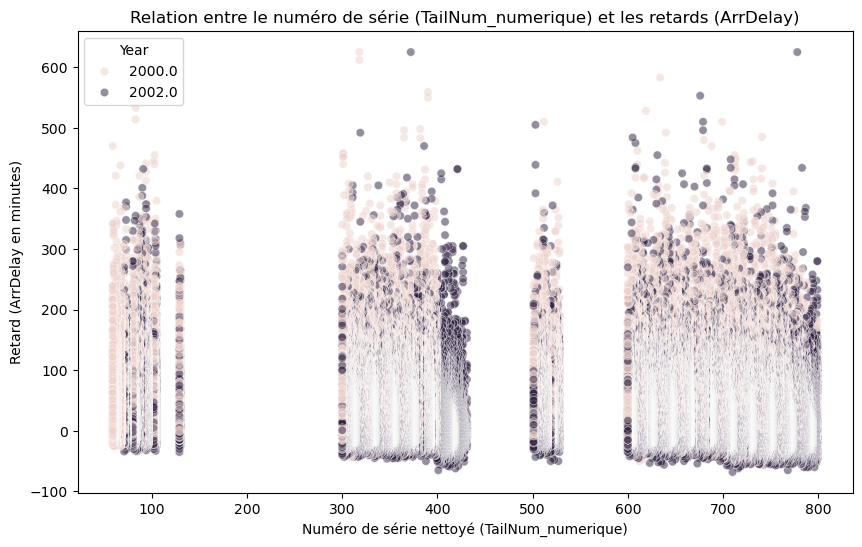


=== Analyse pour l'année 2000.0 ===
Corrélation entre 'TailNum_numerique' et 'ArrDelay' : -0.05 (p-valeur : 0.0000)

Moyennes des retards par groupe d'âge estimé :
Age_Group
Très ancien    12.119833
Ancien         10.672651
Récent         10.860635
Très récent     8.217249
Name: ArrDelay, dtype: float64


C:\Users\21658\AppData\Local\Temp\ipykernel_5580\2666100067.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = subset_cleaned.groupby('Age_Group')['ArrDelay'].mean()
C:\Users\21658\AppData\Local\Temp\ipykernel_5580\2666100067.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_means.index, y=group_means.values, palette="coolwarm")


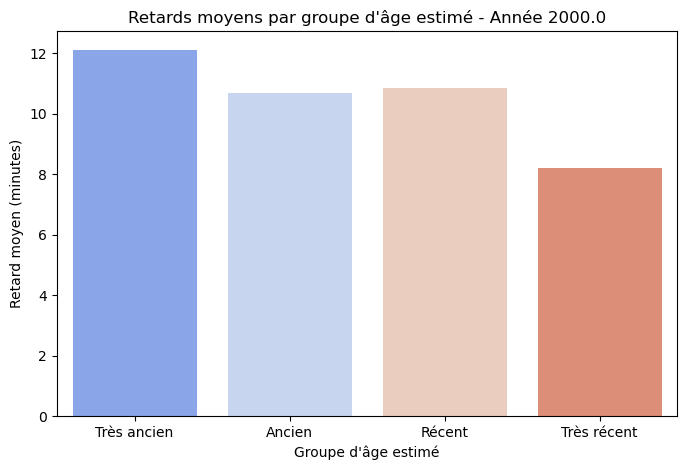


=== Analyse pour l'année 2002.0 ===
Corrélation entre 'TailNum_numerique' et 'ArrDelay' : -0.05 (p-valeur : 0.0000)

Moyennes des retards par groupe d'âge estimé :
Age_Group
Très ancien    5.582390
Ancien         3.700818
Récent         4.871062
Très récent    1.430579
Name: ArrDelay, dtype: float64


C:\Users\21658\AppData\Local\Temp\ipykernel_5580\2666100067.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = subset_cleaned.groupby('Age_Group')['ArrDelay'].mean()
C:\Users\21658\AppData\Local\Temp\ipykernel_5580\2666100067.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_means.index, y=group_means.values, palette="coolwarm")


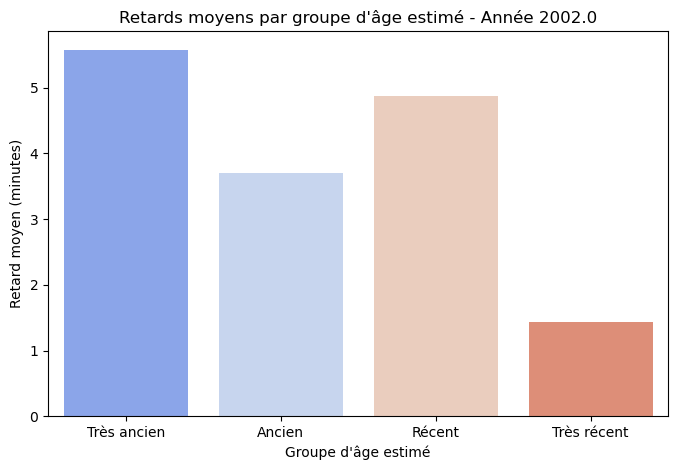


=== Tableau des corrélations et p-valeurs par année ===
     Year  Correlation  P_Value
0  2000.0    -0.045293      0.0
1  2002.0    -0.052736      0.0

=== Tableau des retards moyens par tranche d'âge et année ===
     Year    Age_Group  Mean_Delay
0  2000.0  Très ancien   12.119833
1  2000.0       Ancien   10.672651
2  2000.0       Récent   10.860635
3  2000.0  Très récent    8.217249
4  2002.0  Très ancien    5.582390
5  2002.0       Ancien    3.700818
6  2002.0       Récent    4.871062
7  2002.0  Très récent    1.430579


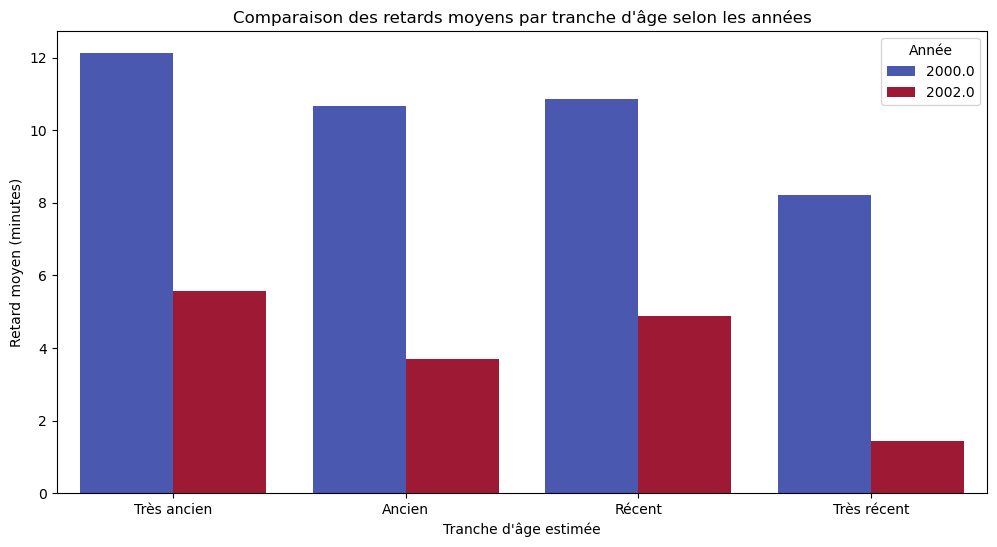

In [ ]:
analyze_tailnum_delays(WN_data)

**Diminution significative des retards au fil des années :**

*Pour toutes les tranches d'âge, on observe une baisse significative des retards moyens entre 2000 et 2002. Cela pourrait indiquer une amélioration globale dans la gestion des vols de la compagnie WN, incluant potentiellement des processus optimisés ou une meilleure gestion des ressources.*

**Corrélation entre l'âge de l'avion et le retard :**

*Les coefficients de corrélation entre l'âge de l'avion et les retards sont faibles et négatifs :
**-0.04536 pour 2000,
-0.05276 pour 2002.**
Ces résultats, associés à des p-valeurs nulles, indiquent qu'il n'existe pas de lien statistiquement significatif entre l'âge des avions et les retards. Cela suggère que d'autres facteurs (par exemple, la météo, la planification des vols, ou la gestion au sol) pourraient avoir un impact plus important sur les retards.*

**Diminution des retards pour les avions les plus anciens :**

*Une des hypothèses pour expliquer cette diminution pourrait être que les avions les plus anciens sont affectés à un nombre limité de vols, ceux-ci étant potentiellement plus courts ou plus facilement maîtrisables.*

*Une autre hypothèse plausible est que la compagnie WN a mis en place des stratégies spécifiques pour optimiser l'utilisation des avions plus anciens, ce qui pourrait inclure une maintenance plus fréquente ou une planification prudente pour minimiser les retards.*

**Conclusion globale :**

*Les résultats montrent une amélioration générale de la gestion des retards au fil des années, indépendamment de l'âge des avions.*

*La compagnie **WN** semble maîtriser ses opérations de manière uniforme, ce qui reflète un effort organisationnel généralisé.*


### 5.2.2 Compagnie DL

In [ ]:
DL_data=companie_analyzer(data,'DL')

C:\Users\21658\AppData\Local\Temp\ipykernel_5580\4061079482.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TailNum_numerique'] = data['TailNum'].str.extract('(\d+)', expand=False).astype(float)


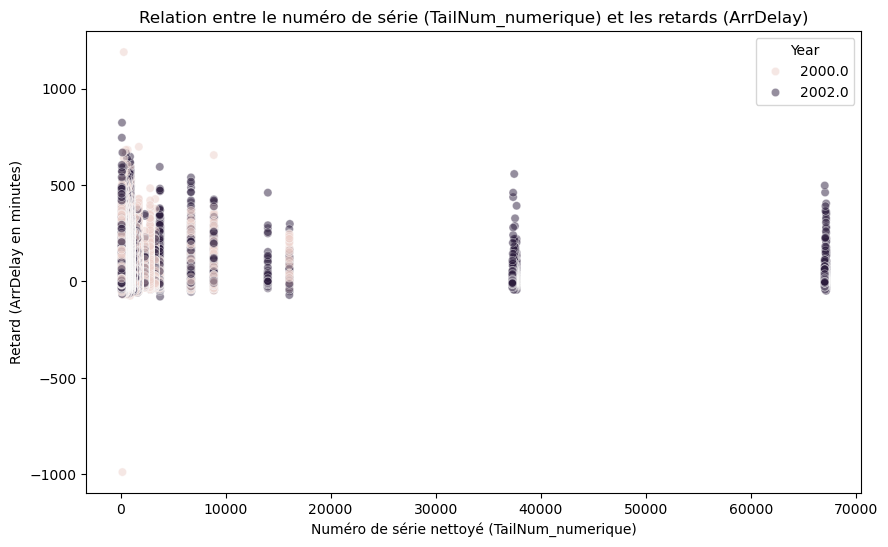


=== Analyse pour l'année 2000.0 ===
Corrélation entre 'TailNum_numerique' et 'ArrDelay' : 0.01 (p-valeur : 0.0000)

Moyennes des retards par groupe d'âge estimé :
Age_Group
Très ancien    8.436168
Ancien         8.430643
Récent         8.235201
Très récent    7.814131
Name: ArrDelay, dtype: float64


C:\Users\21658\AppData\Local\Temp\ipykernel_5580\2666100067.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = subset_cleaned.groupby('Age_Group')['ArrDelay'].mean()
C:\Users\21658\AppData\Local\Temp\ipykernel_5580\2666100067.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_means.index, y=group_means.values, palette="coolwarm")


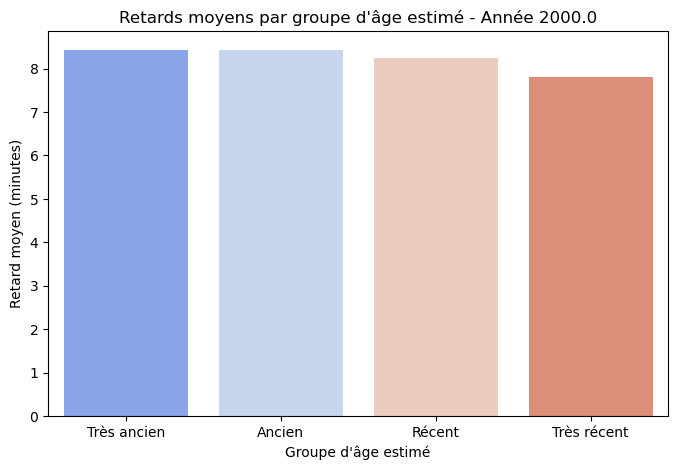


=== Analyse pour l'année 2002.0 ===
Corrélation entre 'TailNum_numerique' et 'ArrDelay' : -0.00 (p-valeur : 0.6096)

Moyennes des retards par groupe d'âge estimé :
Age_Group
Très ancien    5.052579
Ancien         7.401572
Récent         5.553840
Très récent    4.913495
Name: ArrDelay, dtype: float64


C:\Users\21658\AppData\Local\Temp\ipykernel_5580\2666100067.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = subset_cleaned.groupby('Age_Group')['ArrDelay'].mean()
C:\Users\21658\AppData\Local\Temp\ipykernel_5580\2666100067.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_means.index, y=group_means.values, palette="coolwarm")


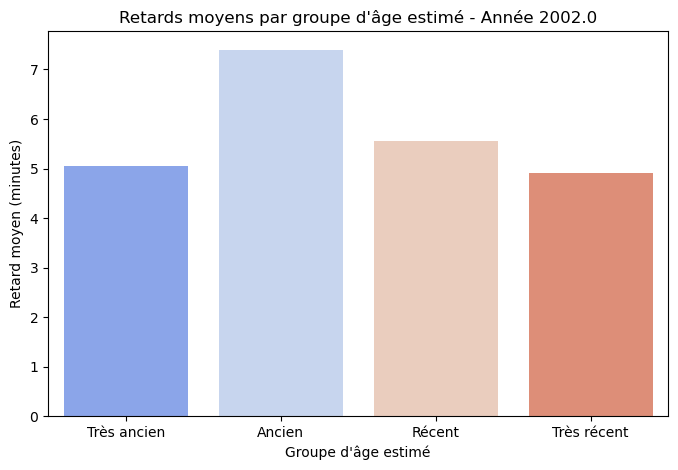


=== Tableau des corrélations et p-valeurs par année ===
     Year  Correlation       P_Value
0  2000.0     0.006222  3.051046e-09
1  2002.0    -0.000598  6.096088e-01

=== Tableau des retards moyens par tranche d'âge et année ===
     Year    Age_Group  Mean_Delay
0  2000.0  Très ancien    8.436168
1  2000.0       Ancien    8.430643
2  2000.0       Récent    8.235201
3  2000.0  Très récent    7.814131
4  2002.0  Très ancien    5.052579
5  2002.0       Ancien    7.401572
6  2002.0       Récent    5.553840
7  2002.0  Très récent    4.913495


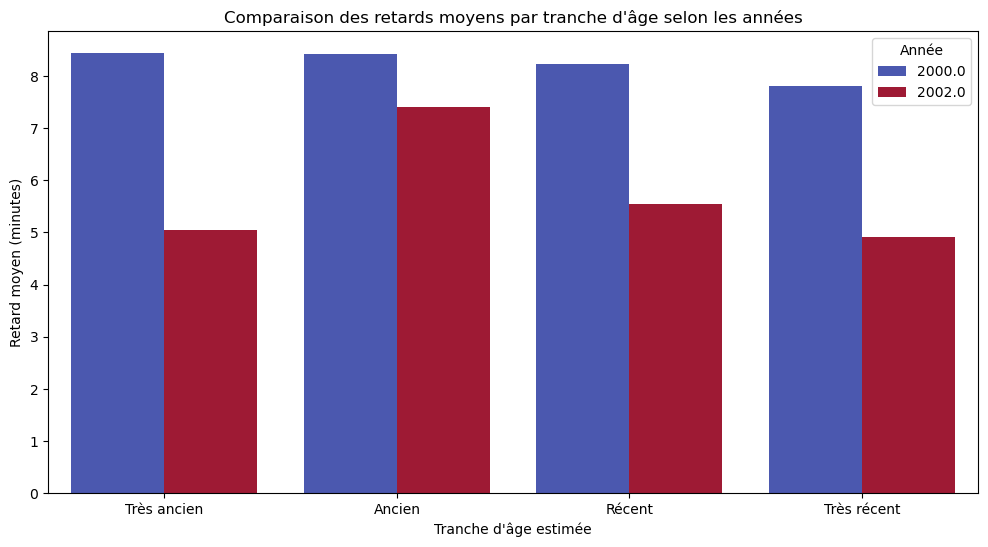

In [ ]:
analyze_tailnum_delays(DL_data)

En observant les graphiques :

**Année 2000 :** Les retards moyens sont relativement constants à travers les différentes tranches d'âge. Cela pourrait indiquer une gestion homogène de la flotte, quelle que soit l'ancienneté des avions.

La corrélation entre l'âge des avions et les retards est très faible (0.006373), ce qui indique l'absence d'une relation significative.
La p-valeur extrêmement faible (2.52e-09) suggère que ce résultat est statistiquement significatif. Toutefois, l'impact pratique est négligeable, car la corrélation est quasi nulle

**Année 2002 :** On note une légère diminution des retards pour les avions très anciens et très récents. Cela peut refléter :

*Une optimisation des vols avec des avions très récents.*

*Une utilisation réduite ou plus stratégique des avions très anciens, comme pour des trajets spécifiques ou moins risqués.*

La corrélation est légèrement négative (-0.000626), mais elle reste insignifiante sur le plan pratique.
La p-valeur (0.595) indique que cette corrélation n'est pas statistiquement significative. Autrement dit, l'âge des avions ne semble pas influencer les retards pour cette année.

**Conclusion générale**

Les résultats pour la compagnie **DL** montrent que l'âge des avions n'a pas d'impact significatif sur les retards.

Les différences dans les retards moyens entre les tranches d'âge et les années semblent refléter davantage des stratégies opérationnelles ou des facteurs contextuels (par exemple, une meilleure gestion globale des vols) plutôt qu'une influence directe de l'âge des avions.




### 5.2.3 Compagnie AA

In [ ]:
AA_data=companie_analyzer(data,'AA')

C:\Users\21658\AppData\Local\Temp\ipykernel_5580\4061079482.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TailNum_numerique'] = data['TailNum'].str.extract('(\d+)', expand=False).astype(float)


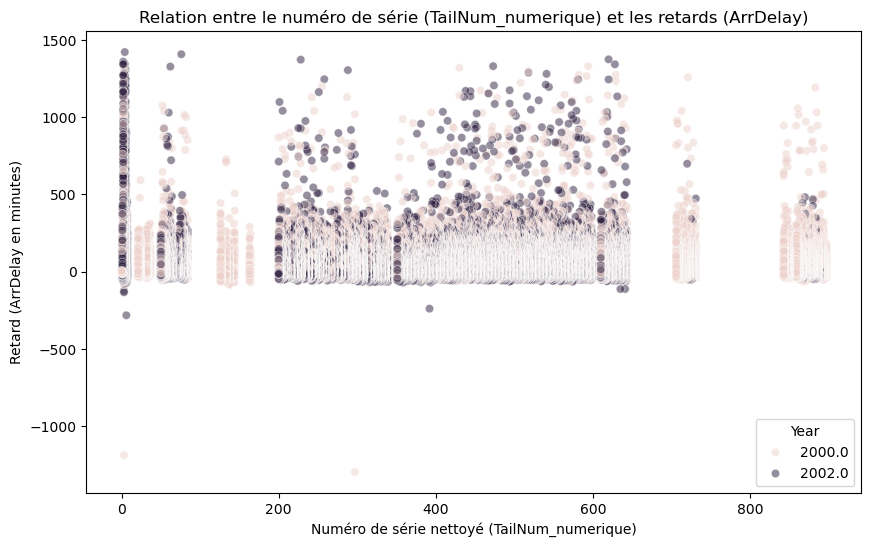


=== Analyse pour l'année 2000.0 ===
Corrélation entre 'TailNum_numerique' et 'ArrDelay' : -0.01 (p-valeur : 0.0000)

Moyennes des retards par groupe d'âge estimé :
Age_Group
Très ancien    10.659553
Ancien          9.478768
Récent          8.441080
Très récent    10.135477
Name: ArrDelay, dtype: float64


C:\Users\21658\AppData\Local\Temp\ipykernel_5580\2666100067.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = subset_cleaned.groupby('Age_Group')['ArrDelay'].mean()
C:\Users\21658\AppData\Local\Temp\ipykernel_5580\2666100067.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_means.index, y=group_means.values, palette="coolwarm")


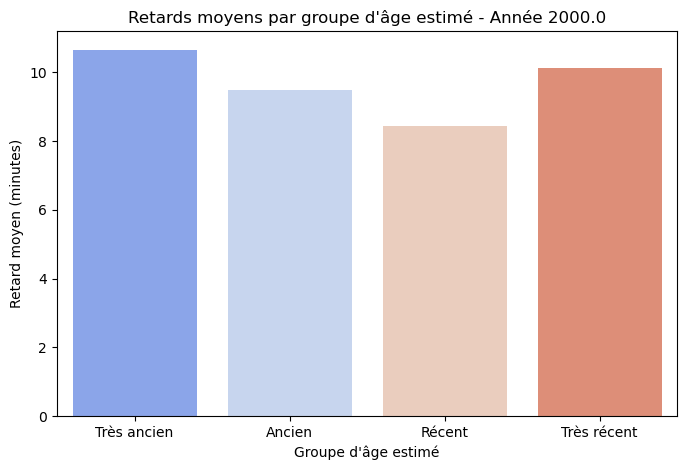


=== Analyse pour l'année 2002.0 ===
Corrélation entre 'TailNum_numerique' et 'ArrDelay' : -0.02 (p-valeur : 0.0000)

Moyennes des retards par groupe d'âge estimé :
Age_Group
Très ancien    1.577537
Ancien         2.650464
Récent         0.555551
Très récent    0.556121
Name: ArrDelay, dtype: float64


C:\Users\21658\AppData\Local\Temp\ipykernel_5580\2666100067.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = subset_cleaned.groupby('Age_Group')['ArrDelay'].mean()
C:\Users\21658\AppData\Local\Temp\ipykernel_5580\2666100067.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_means.index, y=group_means.values, palette="coolwarm")


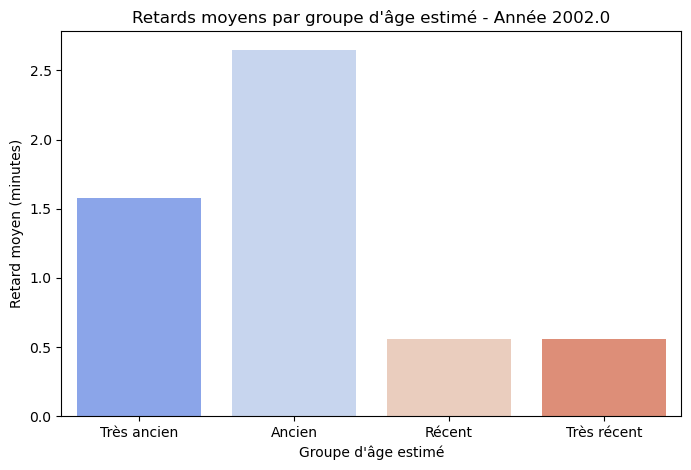


=== Tableau des corrélations et p-valeurs par année ===
     Year  Correlation       P_Value
0  2000.0    -0.007523  2.147047e-10
1  2002.0    -0.018905  1.725200e-67

=== Tableau des retards moyens par tranche d'âge et année ===
     Year    Age_Group  Mean_Delay
0  2000.0  Très ancien   10.659553
1  2000.0       Ancien    9.478768
2  2000.0       Récent    8.441080
3  2000.0  Très récent   10.135477
4  2002.0  Très ancien    1.577537
5  2002.0       Ancien    2.650464
6  2002.0       Récent    0.555551
7  2002.0  Très récent    0.556121


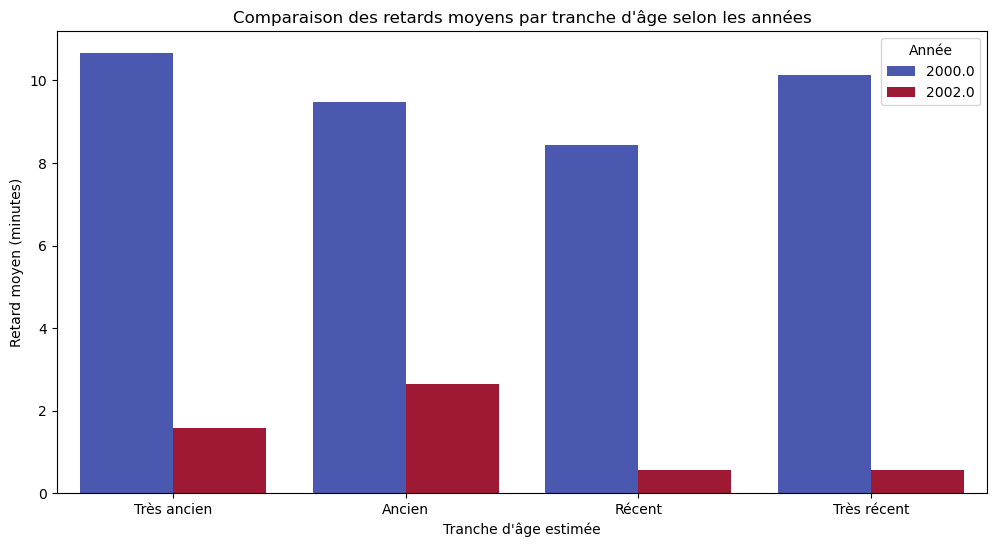

In [ ]:
analyze_tailnum_delays(AA_data)

**Année 2000 :**

*Les retards moyens sont plus élevés dans toutes les catégories de groupe d'âge.
"Très ancien" et "Très récent" ont des retards moyens les plus élevés (environ 10 minutes), tandis que les groupes "Ancien" et "Récent" ont des valeurs légèrement inférieures (entre 8 et 9 minutes).
Cela suggère que les retards étaient importants en 2000, indépendamment de l'ancienneté du groupe.*

**Année 2002 :**
*Une nette diminution des retards moyens est observée par rapport à 2000.
"Ancien" reste la catégorie avec le plus de retards moyens (environ 2,5 minutes), suivie de "Très ancien" (~1,5 minute), tandis que les groupes "Récent" et "Très récent" ont des retards quasi similaires (moins de 1 minute).
Cela montre une amélioration globale des délais, en particulier pour les groupes récents.*

**Conclusion**
*Les résultats de l'année 2000 montrent que l'âge n'a pas d'impact significatif sur les retards moyens. Toutes les tranches d'âge (Très ancien, Ancien, Récent, Très récent) affichent des retards relativement similaires, autour de 8 à 10 minutes. Cela indique que les retards sont généralisés et non liés à l'âge ou à l'ancienneté des groupes.*

*En revanche, en 2002, une amélioration globale est observée dans toutes les tranches d'âge, mais les groupes plus anciens (Très ancien et Ancien) montrent toujours des retards moyens légèrement supérieurs. Cela reflète davantage une différence dans les performances après une intervention ou une amélioration globale, plutôt qu'une corrélation stricte avec l'âge.*



# 6.  Modélisation des vols déviés

**Pour chaque année, on va ajuster un modèle de *régression
logistique* pour prédire la probabilité de déviation des vols aux États-Unis.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score

On va créer une fonction qui nous aide à diviser notre data par rapport à l'année

In [ ]:
def year_splitter(data):
    data_2000 = data[data['Year'] == 2000]
    data_2000 = data_2000.drop(columns=['Year'],axis=1)
    data_2002 = data[data['Year'] == 2002]
    data_2002 = data_2002.drop(columns= ['Year'],axis=1)
    return data_2000, data_2002

In [ ]:
data_2000, data_2002 = year_splitter(data)

In [ ]:
#Supprimer les variables categorielles
categorical_columns = data_2000.select_dtypes(include=['object']).columns
data_2000 = data_2000.drop(columns=categorical_columns, axis=1)

## 6.1 L'annee 2000

In [ ]:
target_2000 = data_2000['Diverted']
features_2000 = data_2000.drop(columns=['Diverted'])
X_2000 = features_2000
y_2000 = target_2000

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_2000, y_2000, test_size=0.2, random_state=42)

### 6.1.1 Model training

In [ ]:
Lr_model = LogisticRegression()
Lr_model.fit(X_train, y_train)

C:\Users\21658\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### 6.1.2 Model evaluation

In [ ]:
#calcuer le résultat (prédiction) de modèle sur l'ensemble train puis test
y_pred_train_Lr = Lr_model.predict(X_train)
y_pred_test_Lr = Lr_model.predict(X_test)
print("F1 Score :", f1_score(y_train, y_pred_train_Lr)) #f1_score
print("Accuracy :", accuracy_score(y_train, y_pred_train_Lr))
print("Precision :", precision_score(y_train, y_pred_train_Lr))
print("Recall :", recall_score(y_train, y_pred_train_Lr))
print("Matrice de confusion :\n", confusion_matrix(y_train, y_pred_train_Lr)) #confusion matrix

F1 Score : 0.1986327674936631
Accuracy : 0.997705235990293
Precision : 0.8096430807764559
Recall : 0.11320259149010681
Matrice de confusion :
 [[4534711     304]
 [  10129    1293]]


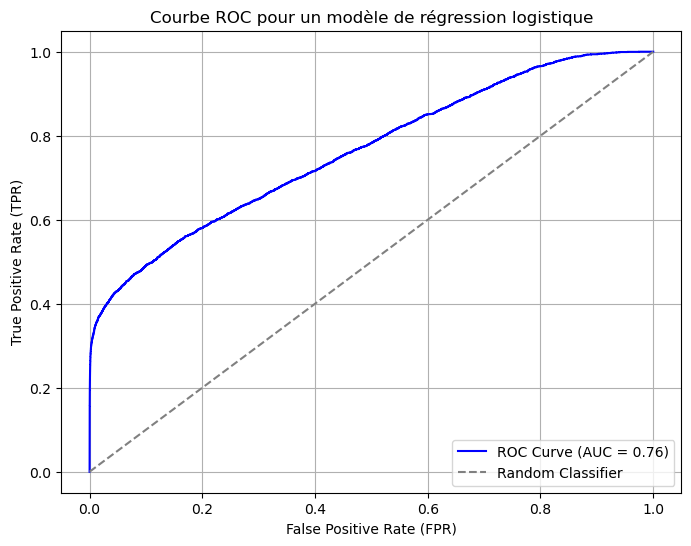

In [ ]:
#  Prédictions probabilistes
y_probs = Lr_model.predict_proba(X_test)[:, 1]  # Probabilité pour la classe positive

#  Calcul des métriques ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

#  Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Courbe ROC pour un modèle de régression logistique")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### 6.1.3 Les coefficients du model

In [ ]:
coefficients = Lr_model.coef_
print(coefficients)

[[-0.04542991 -0.0633845  -0.02486434 -0.00050122 -0.00036133 -0.0008812
   0.00055341 -0.00027556 -0.03572554 -0.05406058  0.00207895 -0.03790459
   0.03483655  0.00912468 -0.13168633  0.09497757 -0.00203985  0.00142266]]


## 6.2 L'annee 2002

In [ ]:
categorical_columns = data_2002.select_dtypes(include=['object']).columns
data_2002 = data_2002.drop(columns=categorical_columns, axis=1)

In [ ]:
target_2002 = data_2002['Diverted']
features_2002 = data_2002.drop(columns=['Diverted'])
X_2002 = features_2002
y_2002 = target_2002

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_2002, y_2002, test_size=0.2, random_state=42)

### 6.2.1 Model training

In [ ]:
Lr_model = LogisticRegression()
Lr_model.fit(X_train, y_train)

C:\Users\21658\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

###  6.2.2 Model evaluation

In [ ]:
y_pred_train_Lr = Lr_model.predict(X_train)
y_pred_test_Lr = Lr_model.predict(X_test)
print("F1 Score :", f1_score(y_train, y_pred_train_Lr)) #f1_score
print("Accuracy :", accuracy_score(y_train, y_pred_train_Lr))
print("Precision :", precision_score(y_train, y_pred_train_Lr))
print("Recall :", recall_score(y_train, y_pred_train_Lr))
print("Matrice de confusion :\n", confusion_matrix(y_train, y_pred_train_Lr)) #confusion matrix

F1 Score : 0.37531455961653687
Accuracy : 0.9987638386402746
Precision : 0.9411057692307693
Recall : 0.23439604849573417
Matrice de confusion :
 [[4210308      98]
 [   5115    1566]]


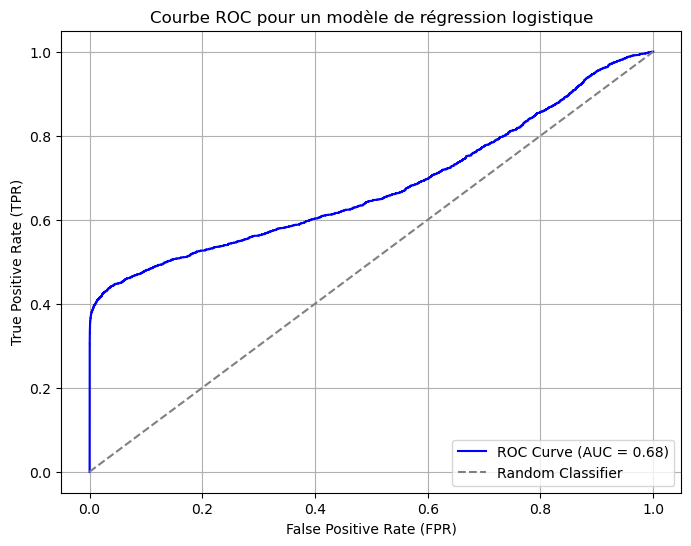

In [ ]:
y_probs = Lr_model.predict_proba(X_test)[:, 1]  # Probabilité pour la classe positive

#  Calcul des métriques ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

#  Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Courbe ROC pour un modèle de régression logistique")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### 6.2.3 Les coefficients du model

In [ ]:
coefficients = Lr_model.coef_
print(coefficients)

[[-0.02516186 -0.04465618 -0.01806734  0.00053772 -0.00148994 -0.0012274
   0.00063939 -0.000566   -0.06325233 -0.04762428  0.02363307 -0.05461077
   0.05824654  0.00899112  0.05108566  0.03350815 -0.0007512   0.00097005]]


# 7. Prediction des retards des arrivées

Dans cette parrie on va tester plusieurs models a fin de selectionner cel qui est le plus robiste pour predir les retards des arrivees.

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
data = data.drop(columns=categorical_columns, axis=1)

In [ ]:
target = data['ArrDelay']
features = data.drop(columns=['ArrDelay'])
X = features
y = target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7.1 Model 1: DT

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2

### 7.1.1 Model training

In [ ]:
DT_model = DecisionTreeRegressor(max_depth=5, random_state=42)
DT_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

### 7.1.2 Model evaluation

In [ ]:
y_pred = DT_model.predict(X_test) #prediction sur l'ensemble test
y_predt = DT_model.predict(X_train) # prediction sur l'ensemble train

In [ ]:
#calculer ces métrique sur l'ensemble train
print(f'MAE = {mae(y_train, y_predt)}')
print(f'MSE = {mse(y_train, y_predt)}')
print(f'R2 = {r2(y_train, y_predt)}')

MAE = 8.437778453570006
MSE = 149.54505857630753
R2 = 0.8608026548516241


In [ ]:
#calculer ces métrique sur l'ensemble test
print(f'MAE = {mae(y_test, y_pred)}')
print(f'MSE = {mse(y_test, y_pred)}')
print(f'R2 = {r2(y_test, y_pred)}')

MAE = 8.443648924193212
MSE = 149.87348638377756
R2 = 0.8601148932740189


## 7.2 Model 2 : Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

### 7.2.1 Model training

In [ ]:
rf_model = RandomForestRegressor(n_estimators=20, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=20, random_state=42)

### 7.2.2 Model evaluation

In [ ]:
y_pred = rf_model.predict(X_test) #prediction sur l'ensemble test
y_predt = rf_model.predict(X_train) # prediction sur l'ensemble train

In [ ]:
#calculer ces métrique sur l'ensemble train
print(f'MAE = {mae(y_train, y_predt)}')
print(f'MSE = {mse(y_train, y_predt)}')
print(f'R2 = {r2(y_train, y_predt)}')

MAE = 1.9300794686898781
MSE = 19.51649911664565
R2 = 0.9818339376139166


In [ ]:
#calculer ces métrique sur l'ensemble test
print(f'MAE = {mae(y_test, y_pred)}')
print(f'MSE = {mse(y_test, y_pred)}')
print(f'R2 = {r2(y_test, y_pred)}')

MAE = 2.0392338199165785
MSE = 27.060635161315084
R2 = 0.9747428319114412


## 7.3 Model 3 : KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

### 7.3.1 Model training

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

### 7.3.2 Model evaluation

In [ ]:
y_pred = knn_model.predict(X_test) #prediction sur l'ensemble test
y_predt = knn_model.predict(X_train) # prediction sur l'ensemble train

In [ ]:
#calculer ces métrique sur l'ensemble train
print(f'MAE = {mae(y_train, y_predt)}')
print(f'MSE = {mse(y_train, y_predt)}')
print(f'R2 = {r2(y_train, y_predt)}')

MAE = 4.321905717537408
MSE = 75.25731538486671
R2 = 0.8842331954814004


In [ ]:
#calculer ces métrique sur l'ensemble test
print(f'MAE = {mae(y_test, y_pred)}')
print(f'MSE = {mse(y_test, y_pred)}')
print(f'R2 = {r2(y_test, y_pred)}')

MAE = 5.6592183828519875
MSE = 126.40317329588872
R2 = 0.8012922776322375


## 7.4 Model 4 : ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### 7.4.1 Model training

In [ ]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Première couche cachée
    Dense(32, activation='relu'),  # Deuxième couche cachée
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
5271/5271 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 8.3215
Epoch 2/50
5271/5271 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - loss: 4.6997
Epoch 3/50
5271/5271 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 5.0010
Epoch 4/50
5271/5271 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 8.0072
Epoch 5/50
5271/5271 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 2.4716
Epoch 6/50
5271/5271 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 4.1632
Epoch 7/50
5271/5271 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 5.0066
Epoch 8/50
5271/5271 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 4.6033
Epoch 9/50
5271/5271 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 11.6932
Epoch 10/50
5271/5271 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 5.9517
Epoch 11/50
5271/5271 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 4.0165
Epoch 12/50
5271/5271 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 3.2338
Epoch 13/50
5271/5271 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 7.8586
Epoch 14/50
5271/5271 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 2.7833
Epoch 15/50
5271/5271

### 7.4.2 Model evaluation

In [ ]:
y_pred = model.predict(X_test) #prediction sur l'ensemble test
y_predt = model.predict(X_train) # prediction sur l'ensemble train

1318/1318 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step
5271/5271 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step


In [ ]:
#calculer ces métrique sur l'ensemble train
print(f'MAE = {mae(y_train, y_predt)}')
print(f'MSE = {mse(y_train, y_predt)}')
print(f'R2 = {r2(y_train, y_predt)}')

MAE = 0.07332238076070928
MSE = 0.8428843892951456
R2 = 0.998703408009862


In [ ]:
#calculer ces métrique sur l'ensemble test
print(f'MAE = {mae(y_test, y_pred)}')
print(f'MSE = {mse(y_test, y_pred)}')
print(f'R2 = {r2(y_test, y_pred)}')

MAE = 0.08774819638472146
MSE = 5.233827450630139
R2 = 0.9917723431709573


In [ ]:
# FIN
# Lekehal Hammada & Neffati Manel
# 3AGI + M2 NePRev
# 2024/2025